In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [6]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 


# # # same dist, caida
for a in caida0517:
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

            
# # same dist, zipf
for a in zipf2a:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in zipf2b:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # diff dist, caida + zipf2a
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, caida + zipf2b
for a in caida0517:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # diff dist, zipf2a + caida
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
for a in zipf2b:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap', 'caida0517-500w_6_caida0816-600w_4.pcap', 'caida0517-500w_6_caida0816-300w_4.pcap', 'caida0517-500w_6_caida0816-150w_4.pcap', 'caida0517-250w_6_caida0816-600w_4.pcap', 'caida0517-250w_6_caida0816-300w_4.pcap', 'caida0517-250w_6_caida0816-150w_4.pcap', 'caida0517-125w_6_caida0816-600w_4.pcap', 'caida0517-125w_6_caida0816-300w_4.pcap', 'caida0517-125w_6_caida0816-150w_4.pcap', 'caida0816-600w_6_caida0517-500w_4.pcap', 'caida0816-600w_6_caida0517-250w_4.pcap', 'caida0816-600w_6_caida0517-125w_4.pcap', 'caida0816-300w_6_caida0517-500w_4.pcap', 'caida0816-300w_6_caida0517-250w_4.pcap', 'caida0816-300w_6_caida0517-125w_4.pcap', 'caida0816-150w_6_caida0517-500w_4.pcap', 'caida0816-150w_6_caida

In [5]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [4]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [2]:
def prepare_profiler_dirty_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    
    profiler_fsd = {}
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        # if file_name.split("-")[0] == "zipf4" or file_name.split("-")[0] == "caida0816" or file_name.split("-")[0] == "zipf2b":
        if file_name.split("-")[0] == "zipf4":
            continue
        profiler_fsd[file_name[:-9]] = []
    
    # profiler_fsd["caida0517-500w"] = []
    # profiler_fsd["caida0816-600w"] = []
    # profiler_fsd["zipf2a-150w"] = []
    # profiler_fsd["zipf2b-400w"] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOffline/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [7]:
def prepare_testing_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    
    profiler_fsd = {}
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        # if file_name.split("-")[0] == "zipf4" or file_name.split("-")[0] == "caida0816" or file_name.split("-")[0] == "zipf2b":
        if file_name.split("-")[0] == "zipf4":
            continue
        profiler_fsd[file_name[:-9]] = []
    
    # profiler_fsd["caida0517-500w"] = []
    # profiler_fsd["caida0816-600w"] = []
    # profiler_fsd["zipf2a-150w"] = []
    # profiler_fsd["zipf2b-400w"] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [3]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    
    return avg_fsd


In [148]:
def plot_mrd_between_profilers():
    # prepare profiler avg dirty fsd
    profiler_fsd = prepare_profiler_dirty_fsd_data()
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # prepare testing avg fsd
    testing_fsd = prepare_testing_fsd_data()
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = get_avg_fsd(fsd_list[:15])
        
    MRDs = []
    labels = list(profiler_avg_fsd.keys())
    indexs = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3']
    
    ## cal by avg fsd
    # for testing_name, t_fsd in testing_avg_fsd.items():
    #     single_MRDs = []
    #     for profiler_name, p_fsd in profiler_avg_fsd.items():
    #         mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
    #         single_MRDs.append(mrd)
    #     MRDs.append(single_MRDs)
    
    # cal by avg mrd
    for testing_name, t_fsd in testing_fsd.items():
        single_MRDs = []
        for profiler_name, p_fsd in profiler_avg_fsd.items():
            total_mrd = 0.0
            for fsd in t_fsd:
                mrd = calculate_mrd(p_fsd, fsd)
                total_mrd += mrd
            single_MRDs.append(round(total_mrd/len(t_fsd), 2))
        MRDs.append(single_MRDs)
    
    # Plot heatmap
    color = 'Blues'
    plt.figure(figsize=(10, 10))
    plt.imshow(MRDs, cmap=color , interpolation='nearest')

    # Add annotations for each cell
    for i in range(len(MRDs)):
        for j in range(len(MRDs[i])):
            plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black')

    plt.xticks(np.arange(len(labels)), indexs, rotation=0)
    plt.yticks(np.arange(len(labels)), indexs, rotation=0)
    

    plt.xlabel('Profilers', fontsize=16)
    plt.ylabel('Testing', fontsize=16)
    plt.title('MRD', fontsize=20)
    plt.colorbar(shrink=0.6)  # Add colorbar
    for i, label in enumerate(labels):
        plt.text(len(labels)+4, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
    plt.tight_layout()
    plt.show()   
        

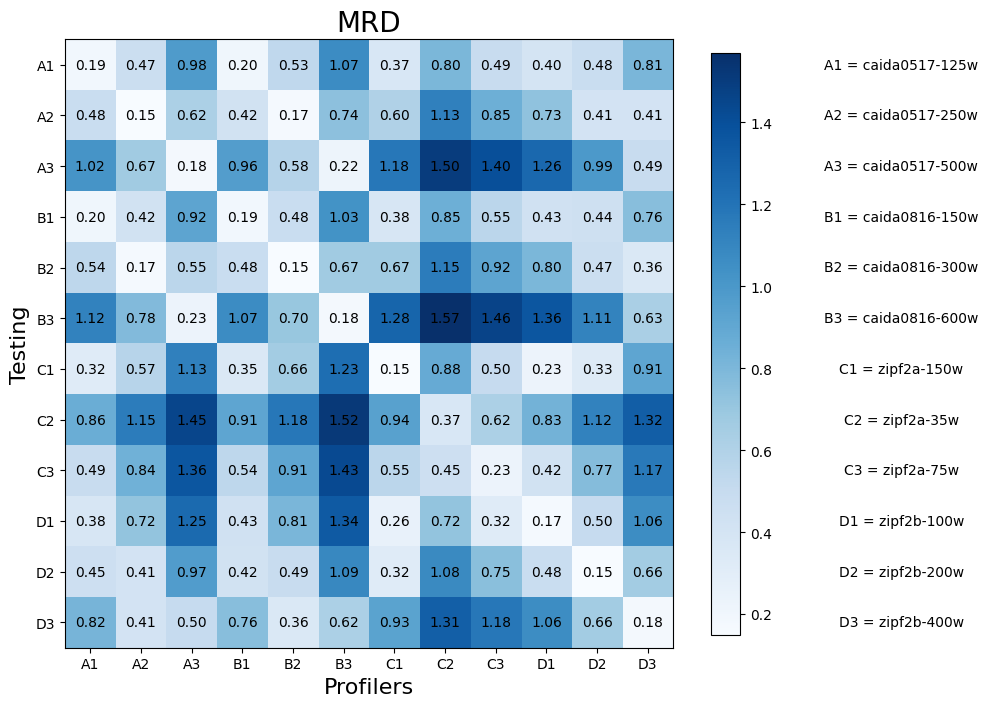

In [149]:
plot_mrd_between_profilers()

In [172]:
def plot_mrd_in_single_profiler():
    # prepare profiler avg dirty fsd
    profiler_fsd = prepare_profiler_dirty_fsd_data()
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = []
        for i in range(10):
            profiler_avg_fsd[name].append(get_avg_fsd(fsd_list[5*i:min(5+5*i, len(fsd_list))]))
        
    # prepare testing avg fsd
    testing_fsd = prepare_testing_fsd_data()
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = []
        for i in range(10):
            testing_avg_fsd[name].append(get_avg_fsd(fsd_list[5*i:min(5+5*i, len(fsd_list))]))
        
    MRDs = []
    labels = list(profiler_avg_fsd.keys())
    indexs = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3']
    time_indexs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    
        
    for label in labels:
        MRDs = []
        for t_fsd in testing_avg_fsd[label]:
            single_MRDs = []
            for p_fsd in profiler_avg_fsd[label]:
                mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
                single_MRDs.append(mrd)
            MRDs.append(single_MRDs)
        # MRDs = []
        # for t_fsd in testing_fsd[label]:
        #     single_MRDs = []
        #     for p_fsd in profiler_fsd[label]:
        #         mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
        #         single_MRDs.append(mrd)
        #     MRDs.append(single_MRDs)
            
    
        # Plot heatmap
        plt.figure(figsize=(14, 14))
        plt.imshow(MRDs, cmap='Greens' , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(MRDs)):
            for j in range(len(MRDs[i])):
                plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(time_indexs)), time_indexs, rotation=0)
        plt.yticks(np.arange(len(time_indexs)), time_indexs, rotation=0)
        # plt.xticks(np.arange(len(profiler_fsd[label])), [i for i in range(1, len(profiler_fsd[label])+1)], rotation=0)
        # plt.yticks(np.arange(len(testing_fsd[label])), [i for i in range(1, len(testing_fsd[label])+1)], rotation=0)
        

        plt.xlabel('Profilers', fontsize=16)
        plt.ylabel('Testing', fontsize=16)
        plt.title(f'{label}\'s MRD', fontsize=20)
        plt.colorbar(shrink=0.8)  # Add colorbar
        # for i, label in enumerate(labels):
        #     plt.text(len(labels)+4, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        # plt.tight_layout()
        plt.show()   
        

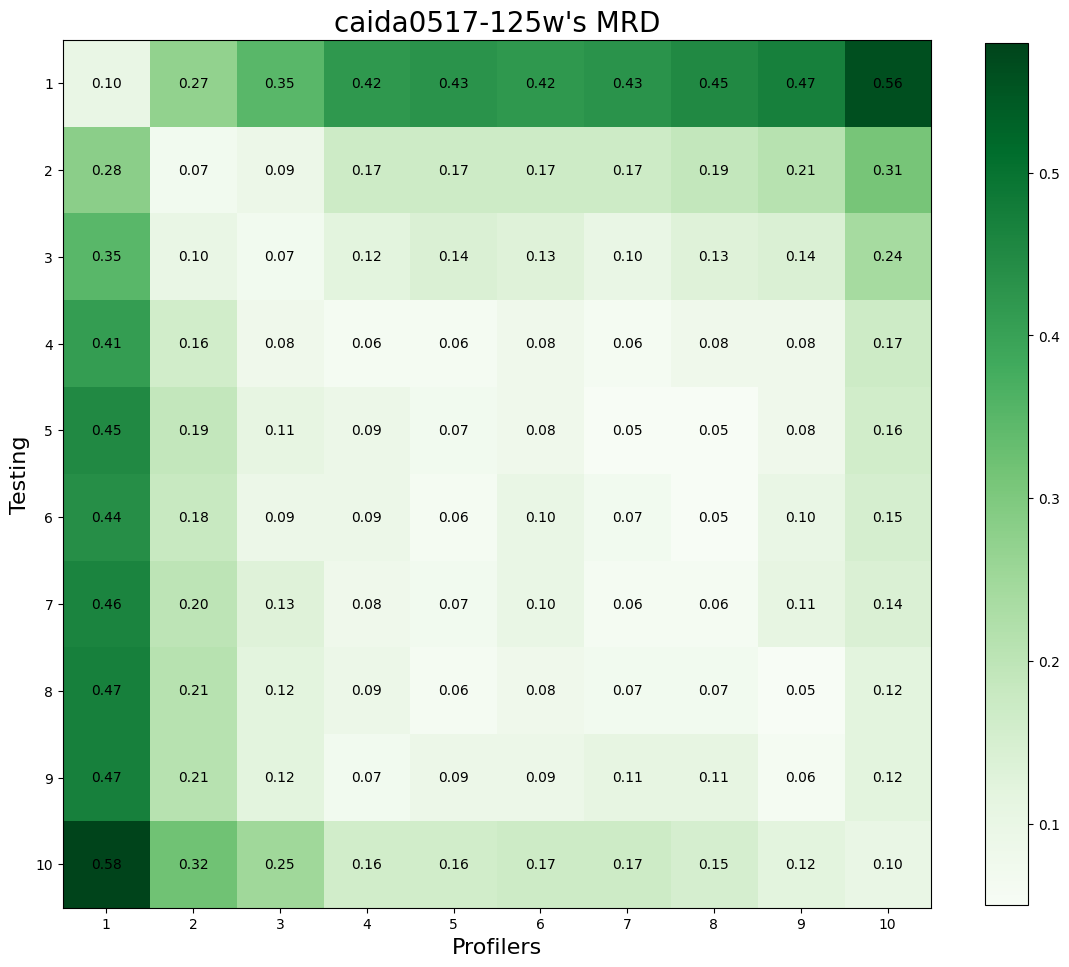

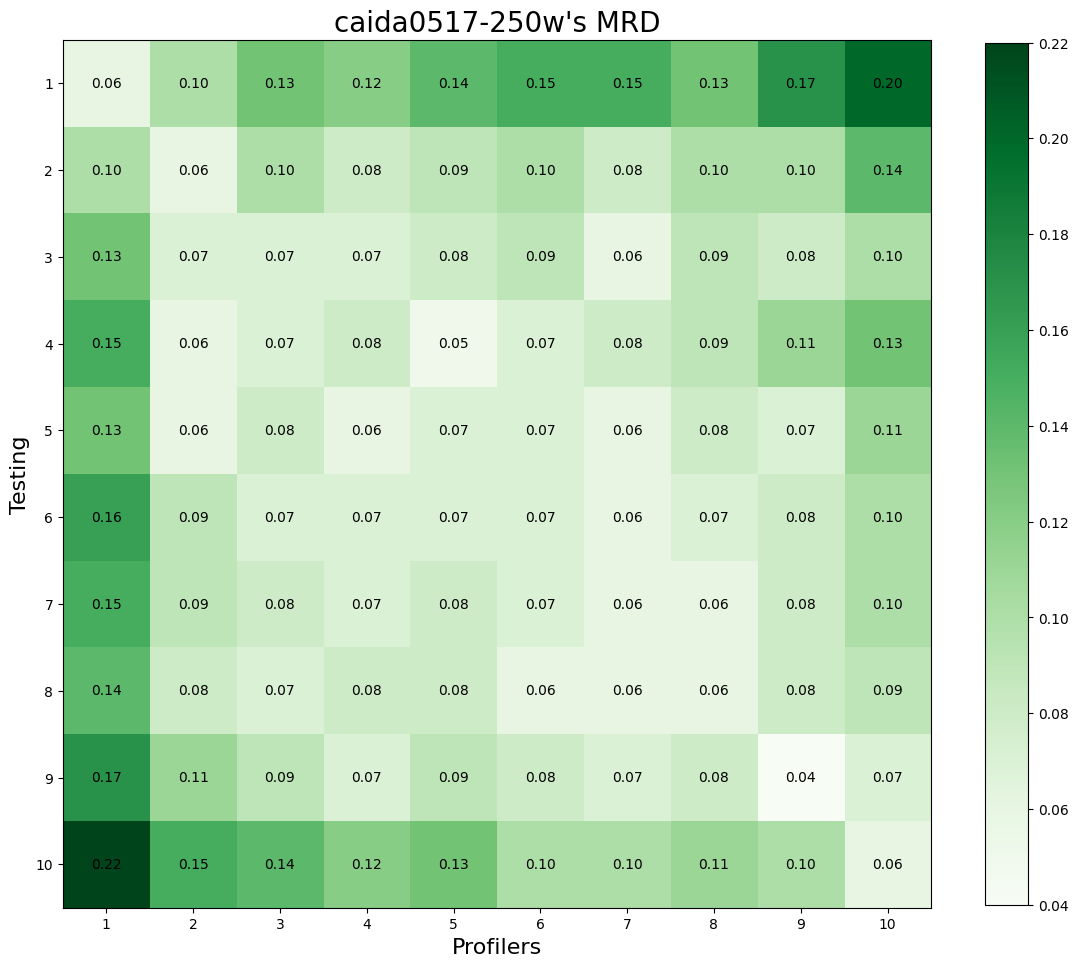

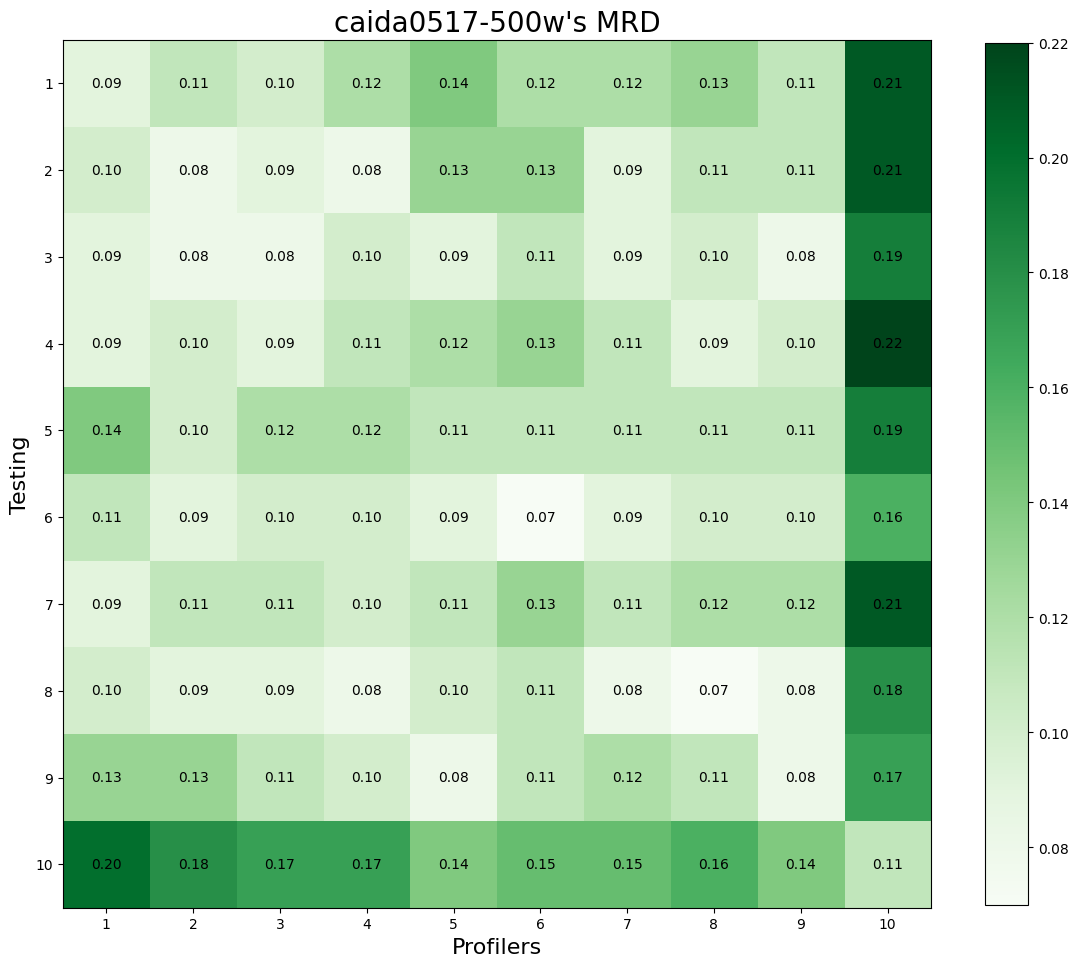

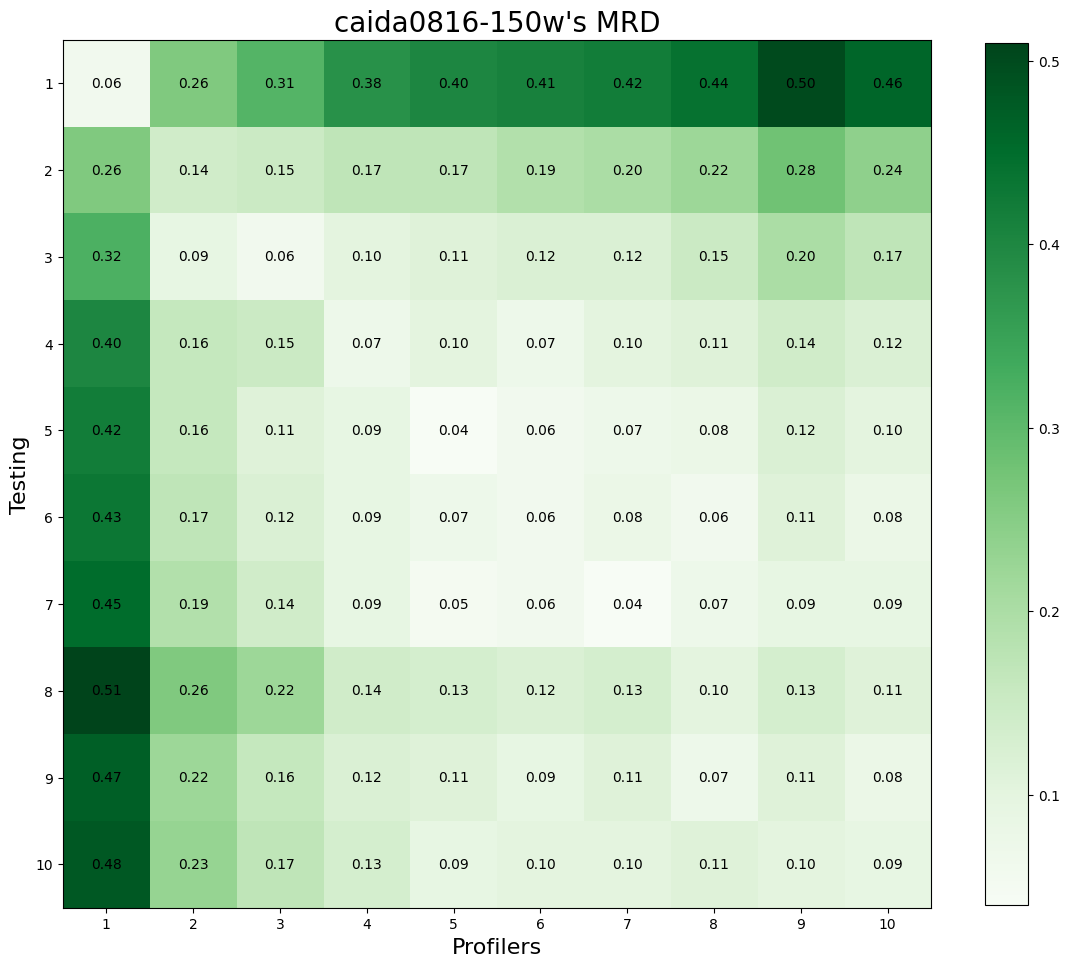

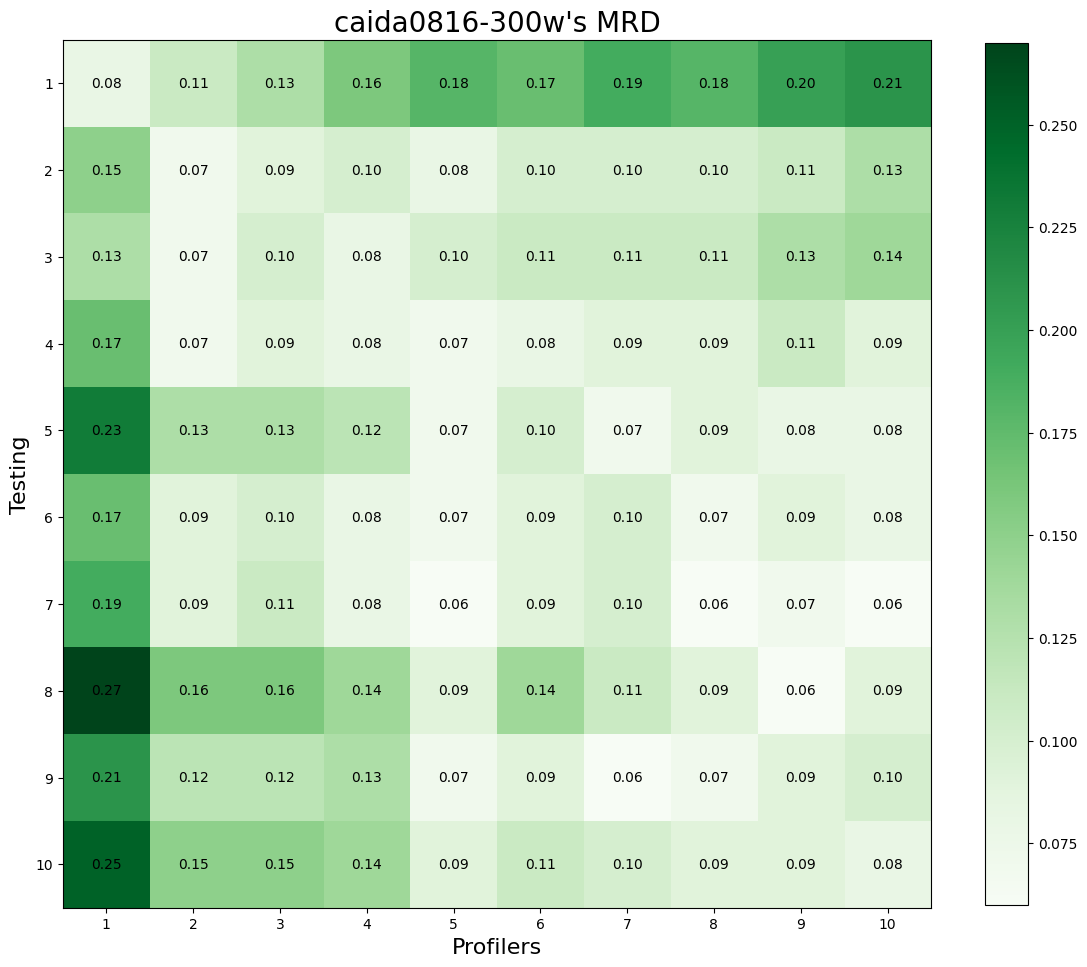

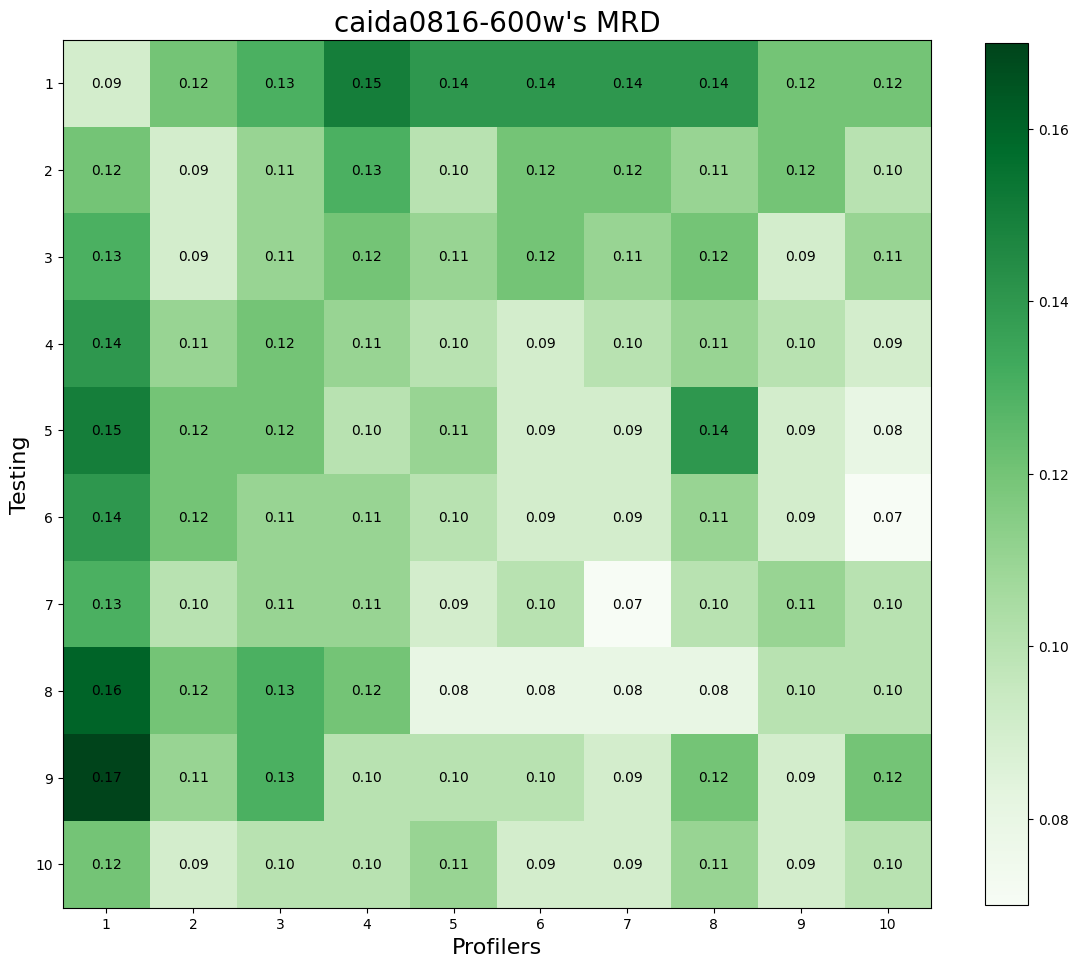

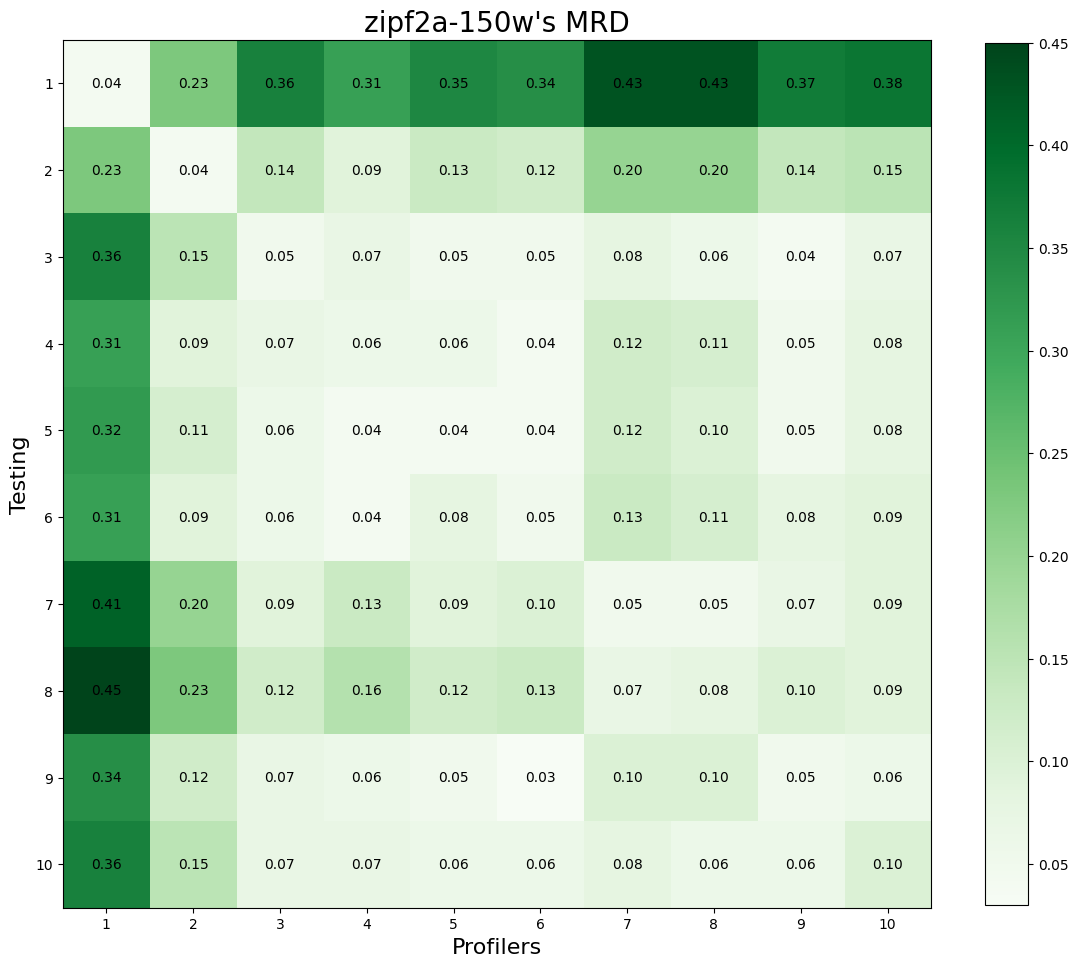

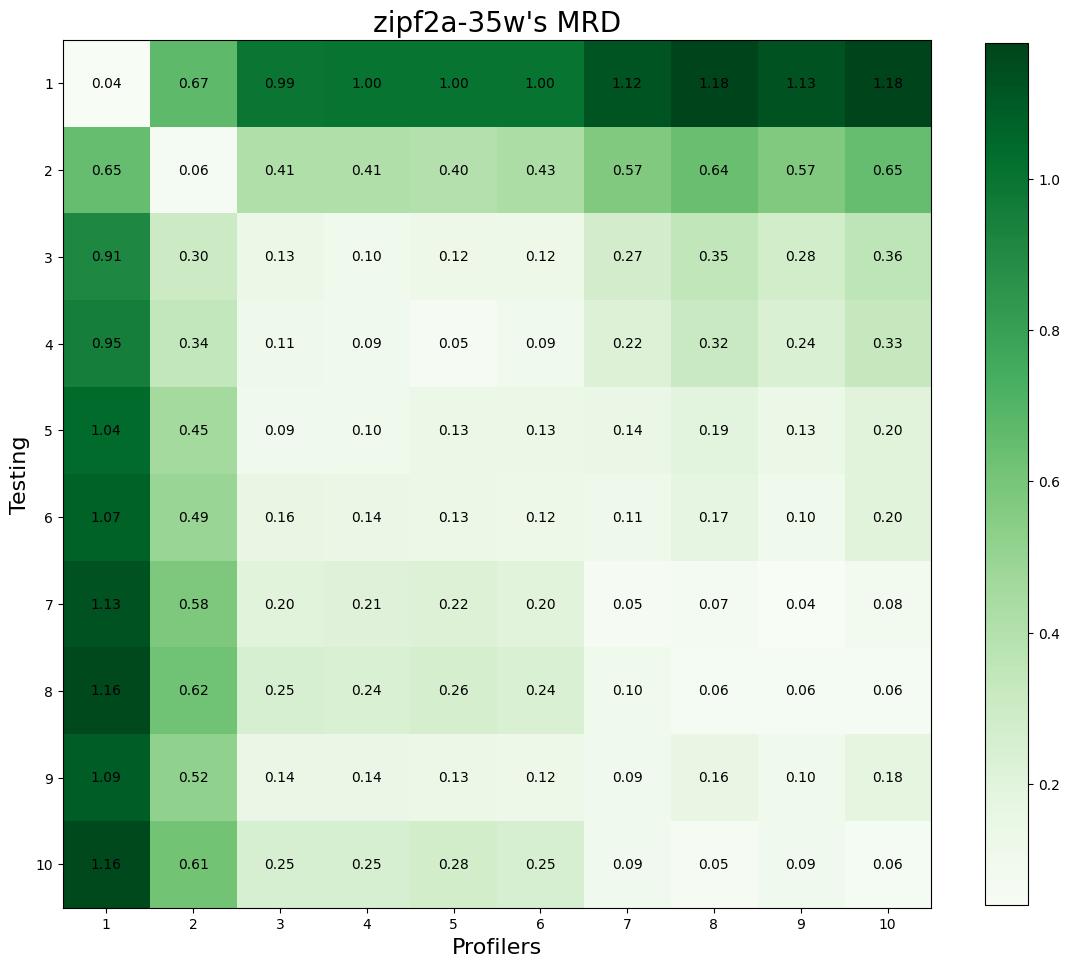

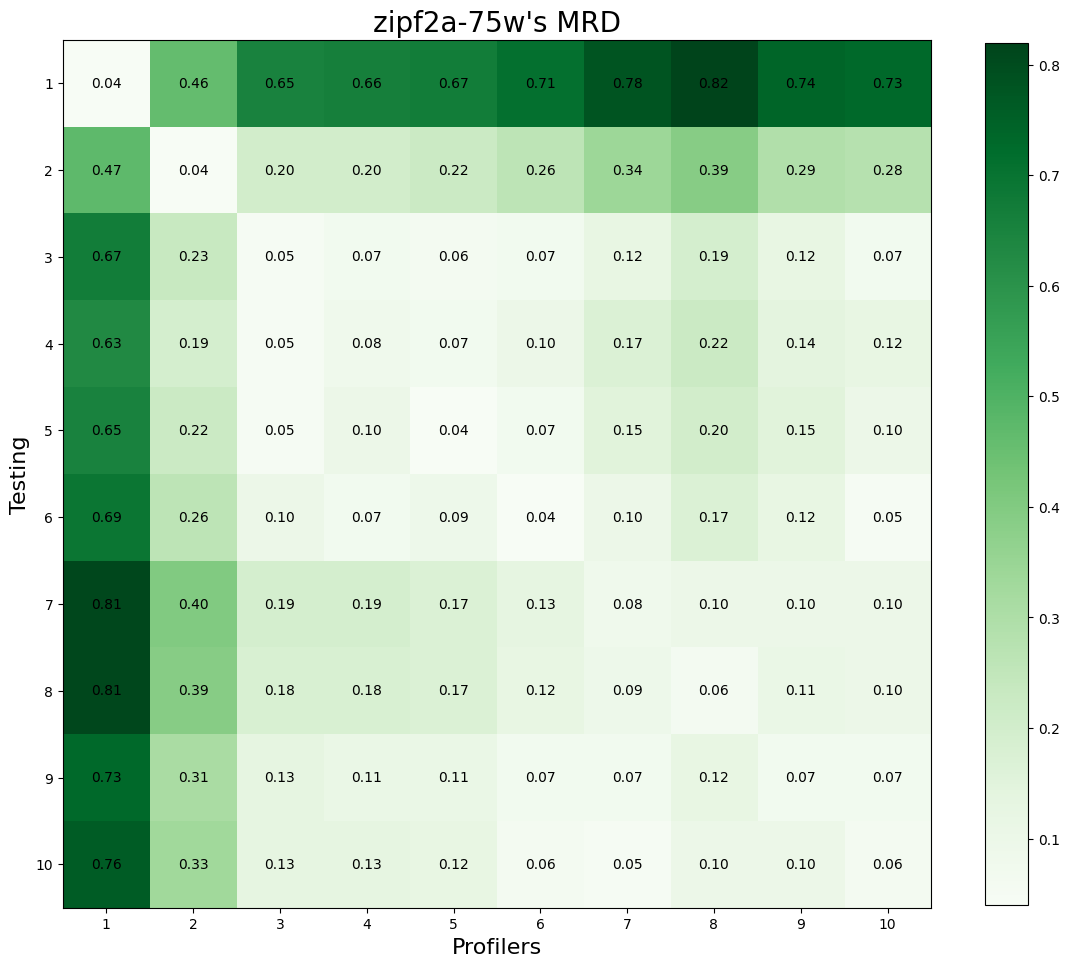

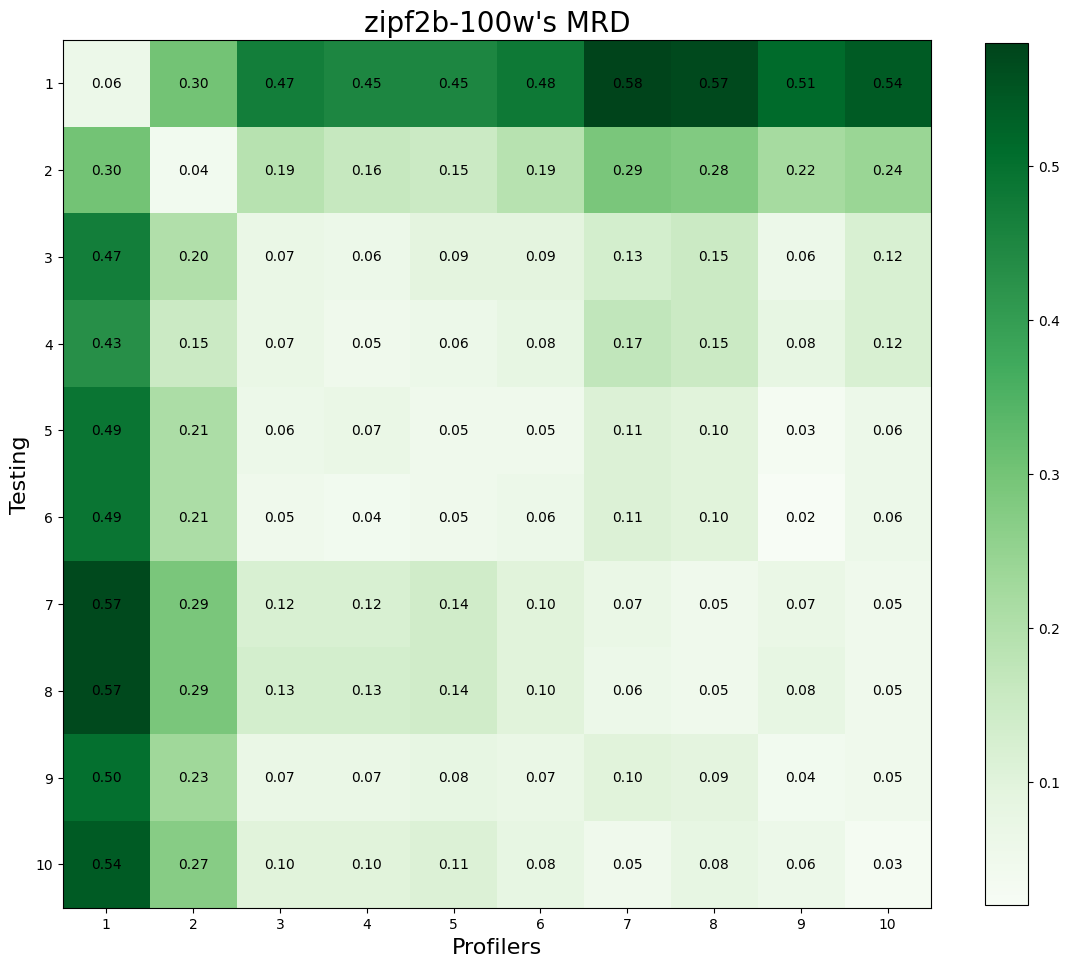

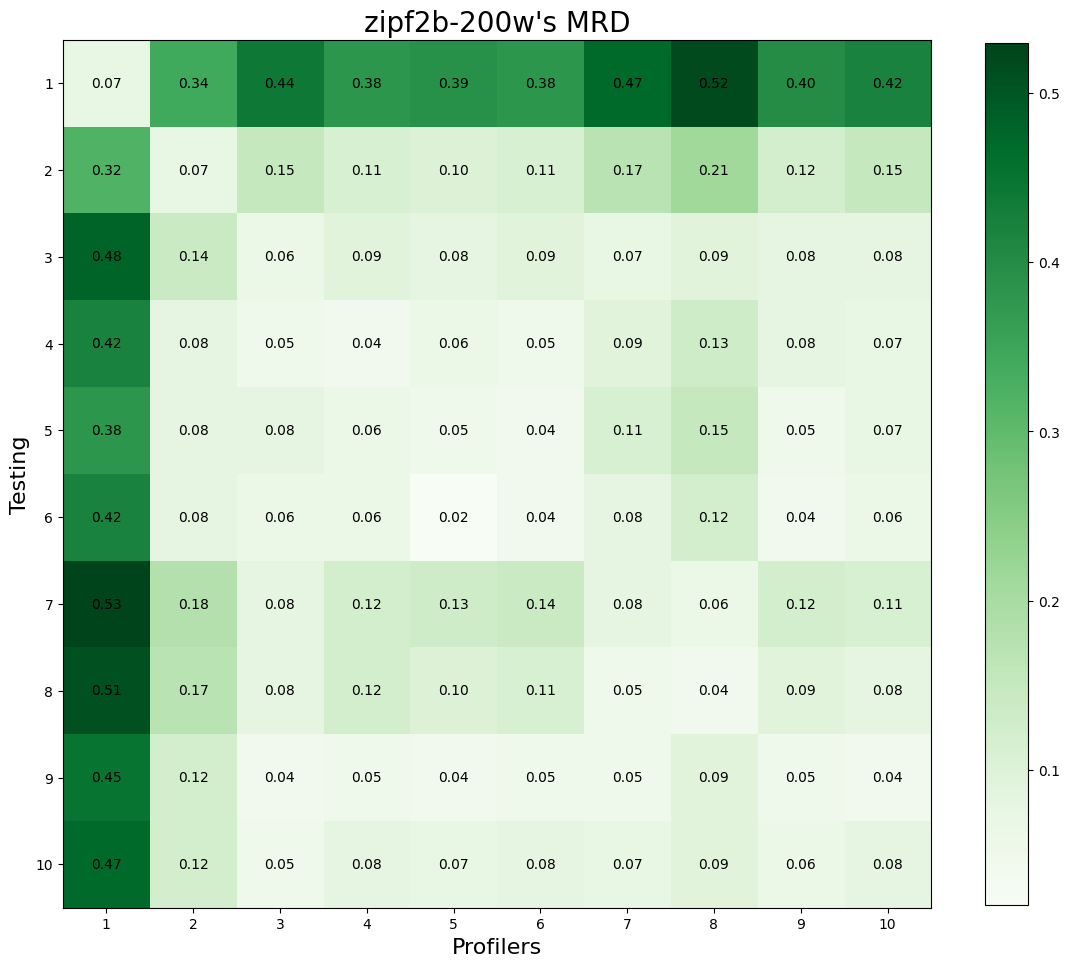

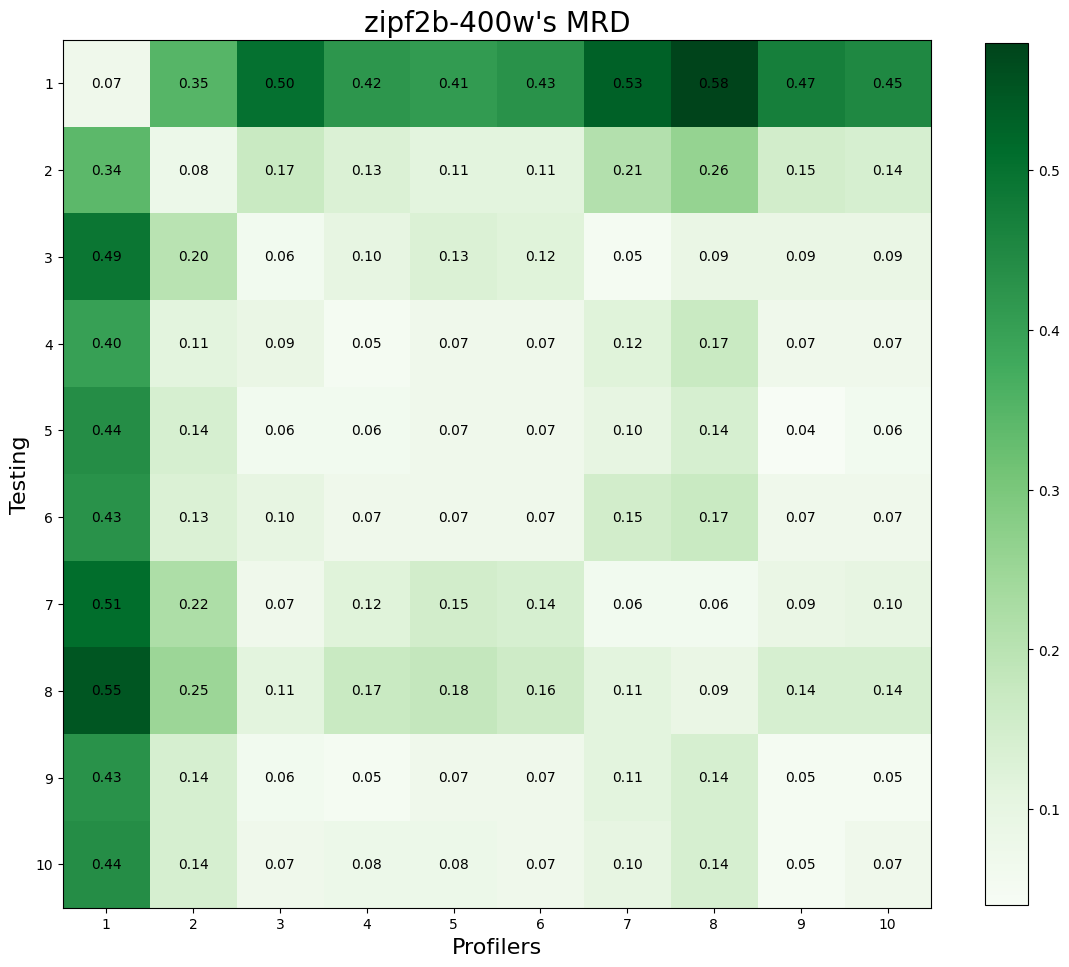

In [173]:
plot_mrd_in_single_profiler()